In [1]:
import pandas as pd
import numpy as np


# Decision Tree Practicle Implementation

In [2]:
#Data Ingestion 
df=pd.read_csv(r"https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df.head()  #observing data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
len(df["quality"].unique())   #checking no.of unique values

6

In [5]:
df["quality"].value_counts()  #checking counts of all the unique values

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df.describe().T #observing basic statistics

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.duplicated().sum()   #checking no.of duplicate values 

240

In [8]:
df=df.drop_duplicates()   #droping duplicate values

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum() #checking any null values are there

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
from sklearn.model_selection import train_test_split , GridSearchCV    #installing required libraries 


In [13]:
x=df.drop("quality", axis=1)     #taking independent features
y=df["quality"]  #taking dependent features

In [14]:
x_train , x_test , y_train , y_test=train_test_split(x , y , test_size=0.33 , random_state=10)     #applying train_test_split

There is no need to scale data into same scale because , spliting will be same before and after scaling .There will be  no difference 

In [15]:
x_train.shape , x_test.shape  #no . of rows and columns

((910, 11), (449, 11))

# Descision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [17]:
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [18]:
y_predict=model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
print("\naccuracy score :",accuracy_score(y_test , y_predict) , "   ---> dumb model \n" )  
print("model score :   ",model.score(x_train , y_train) , "                 -----> overfitting model")   


accuracy score : 0.4766146993318486    ---> dumb model 

model score :    1.0                  -----> overfitting model


In [20]:

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [21]:
#GridsearchCV select  each and every combination of data but Random forest pick randomly 
from sklearn.model_selection import GridSearchCV    #hyperparameter tuning

In [22]:
grid_sear_cv=GridSearchCV(estimator=model , param_grid=grid_param , cv=3 , verbose=1)

In [23]:
grid_sear_cv.fit(x_train  , y_train)


Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [24]:
grid_sear_cv.best_params_  #checking best parameter 

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 3,
 'splitter': 'random'}

In [25]:
model_with_para=DecisionTreeClassifier(criterion ="gini", max_depth =9, min_samples_leaf =9, min_samples_split = 4, splitter ="random")

In [26]:
model_with_para.fit(x_train  , y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=4,
                       splitter='random')

In [27]:
y_predict2=model_with_para.predict(x_test)

In [28]:
print(accuracy_score(y_test ,y_predict2))

0.5501113585746102


[Text(0.6546875, 0.95, 'x[10] <= 10.556\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.4814338235294118, 0.85, 'x[6] <= 96.641\ngini = 0.539\nsamples = 564\nvalue = [4, 17, 334, 185, 24, 0]'),
 Text(0.3275735294117647, 0.75, 'x[9] <= 0.605\ngini = 0.567\nsamples = 488\nvalue = [4, 17, 265, 179, 23, 0]'),
 Text(0.1875, 0.65, 'x[9] <= 0.558\ngini = 0.512\nsamples = 254\nvalue = [2, 15, 160, 75, 2, 0]'),
 Text(0.09852941176470588, 0.55, 'x[1] <= 0.709\ngini = 0.454\nsamples = 151\nvalue = [1, 11, 106, 33, 0, 0]'),
 Text(0.05588235294117647, 0.45, 'x[1] <= 0.462\ngini = 0.459\nsamples = 107\nvalue = [0, 5, 73, 29, 0, 0]'),
 Text(0.023529411764705882, 0.35, 'x[10] <= 9.81\ngini = 0.507\nsamples = 34\nvalue = [0, 1, 20, 13, 0, 0]'),
 Text(0.011764705882352941, 0.25, 'gini = 0.363\nsamples = 21\nvalue = [0, 0, 16, 5, 0, 0]'),
 Text(0.03529411764705882, 0.25, 'gini = 0.521\nsamples = 13\nvalue = [0, 1, 4, 8, 0, 0]'),
 Text(0.08823529411764706, 0.35, 'x[10] <= 9.789

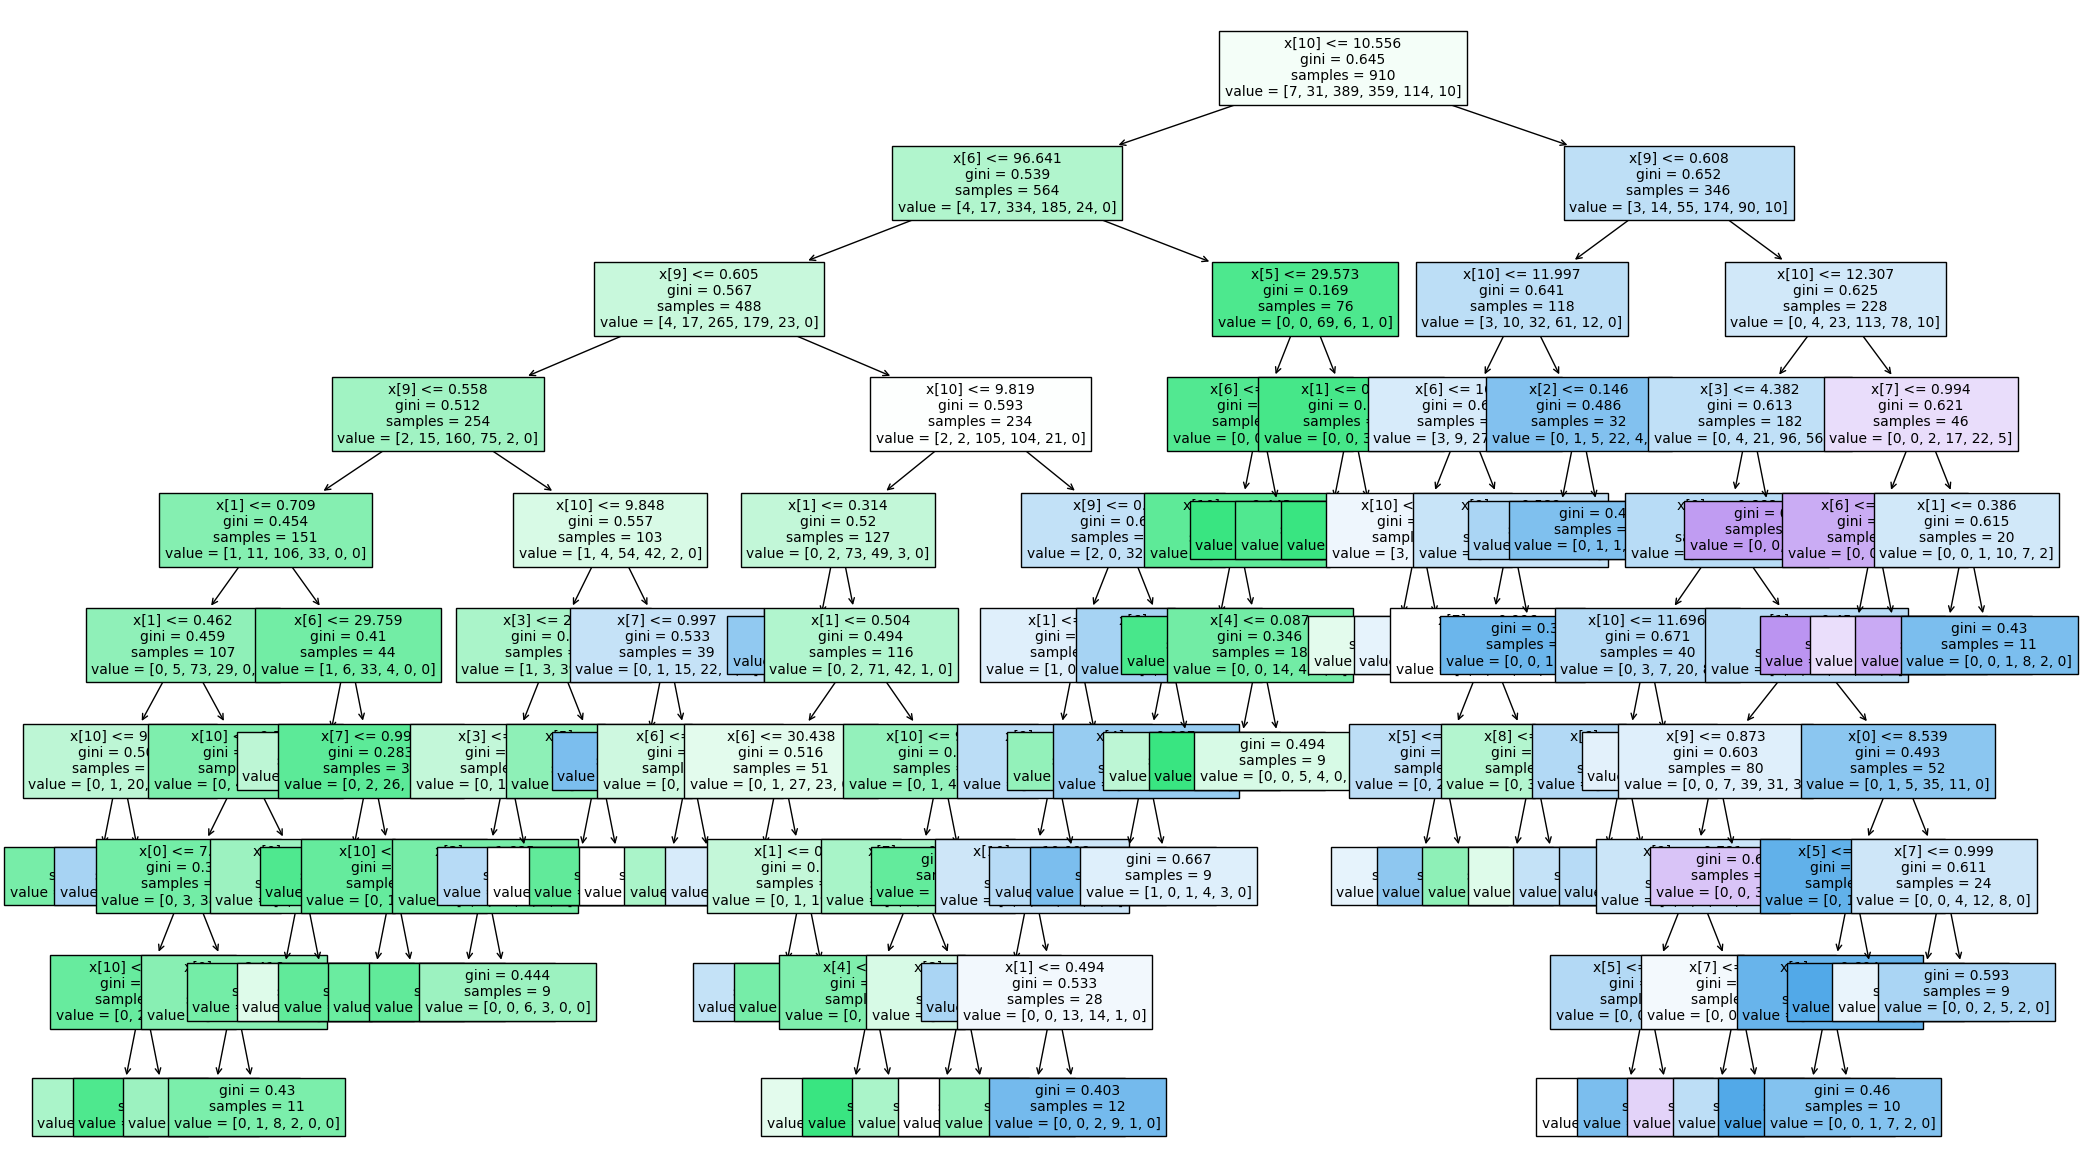

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_para ,filled=True , fontsize=10)


In [31]:
fig.savefig("Decision_tree_classifier.png")